# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [2]:
# import libraries here
import numpy as np
import pandas as pd

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
# your answer here
data = pd.read_csv(r'C:\Users\WM Miramontes\Documents\BootCamp\lab-pivot-table-and-correlation\your_code\Employee.csv')

#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [9]:
data

Name Department Education Gender      Title  Years  Salary
0    Jose         IT  Bachelor      M    analyst      1      35
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
6  Carlos         IT    Master      M         VP      8      70
7   Pedro         IT       Phd      M  associate      7      60
8     Ana         HR    Master      F         VP      8      70

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


In [4]:
# your answer here-1st way
(data.groupby('Department', as_index=False).agg({'Salary': np.mean}))

Department  Salary
0         HR   45.00
1         IT   48.75
2      Sales   55.00

In [11]:
# your answer here-2nd way
pivote = pd.pivot_table(data,
                        values='Salary',
                        columns='Department',
                        index=None,
                        aggfunc={'Salary': np.mean},
                        
                        )
pivote

Department    HR     IT  Sales
Salary      45.0  48.75   55.0

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [14]:
# your answer here
pivote = pd.pivot_table(data,
                        values='Salary',
                        columns=['Department', 'Title'],
                        index=None,
                        aggfunc={'Salary': np.mean},
                        
                        )
pivote

Department    HR            IT                       Sales
Title         VP analyst    VP analyst associate associate
Salary      70.0    32.5  70.0    32.5      60.0      55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [20]:
# your answer here
pivote = pd.pivot_table(data,
                        values='Salary',
                        columns='Years',
                        index='Title',
                       )
pivote

Years         1     2     3     4     7     8
Title                                        
VP          NaN   NaN   NaN   NaN   NaN  70.0
analyst    35.0  30.0   NaN  35.0   NaN   NaN
associate   NaN  55.0  55.0   NaN  60.0   NaN

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [21]:
# your answer here
pivote = pd.pivot_table(data,
                        values=['Salary', 'Name'],                       
                        index='Department',
                        aggfunc={'Salary': 'mean', 'Name': 'count'},
                        
                        )
pivote

Name  Salary
Department              
HR             3   45.00
IT             4   48.75
Sales          2   55.00

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [27]:
# your answer here
pivote = pd.pivot_table(data,
                        values='Salary',                       
                        index=['Department', 'Title'],
                        aggfunc=['mean','min', 'max', 'std']
                        
                        
                        )
pivote.fillna(0)

mean    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [9]:
# your answer here


#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [28]:
# your answer here
pivote = pd.pivot_table(data,
                        values=['Salary', 'Name'],                       
                        index='Department',
                        aggfunc={'Salary': 'sum', 'Name': 'count'},
                        
                        )
pivote

Name  Salary
Department              
HR             3     135
IT             4     195
Sales          2     110

#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [30]:
# your answer here
pivote = pd.pivot_table(data,
                        values=['Salary', 'Years'],                       
                        index=['Department','Title'],
                        aggfunc={'Salary': 'mean', 'Years': 'count'},
                        
                        )
pivote

Salary  Years
Department Title                   
HR         VP           70.0      1
           analyst      32.5      2
IT         VP           70.0      1
           analyst      32.5      2
           associate    60.0      1
Sales      associate    55.0      2

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [12]:
# your answer here--Your custom function here
        

In [13]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [3]:
# your answer here
fitbit = pd.read_csv(r'C:\Users\WM Miramontes\Documents\BootCamp\lab-pivot-table-and-correlation\your_code\Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [4]:
# your answer here
fitbit.head()

Date  Calorie burned  Steps  Distance  Floors  Minutes Sedentary  \
0  08-05-2015            1934    905      0.65       0              1.355   
1  09-05-2015            3631  18925     14.11       4            611.000   
2  10-05-2015            3204  14228     10.57       1            602.000   
3  11-05-2015            2673   6756      5.02       8            749.000   
4  12-05-2015            2495    502      3.73       1            876.000   

   Minutes Lightly Active  Minutes Fairly Active  Minutes Very Active  \
0                      46                      0                    0   
1                     316                     61                   60   
2                     226                     14                   77   
3                     190                     23                    4   
4                     171                      0                    0   

   Activity Calories  MinutesOfSleep  MinutesOfBeingAwake  NumberOfAwakings  \
0               1680             384                   26                23   
1               2248             454                   35                21   
2               1719             387                   46                25   
3               9620             311                   31                21   
4               7360             407                   65                44   

   LengthOfRestInMinutes  
0                    417  
1                    491  
2                    436  
3                    350  
4                    491

In [5]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# your answer here
fitbit.corr(method='spearman')

Calorie burned     Steps  Distance    Floors  \
Calorie burned                1.000000  0.607185  0.715323  0.380319   
Steps                         0.607185  1.000000  0.829712  0.375515   
Distance                      0.715323  0.829712  1.000000  0.464446   
Floors                        0.380319  0.375515  0.464446  1.000000   
Minutes Sedentary            -0.039045 -0.121997 -0.067611  0.096765   
Minutes Lightly Active        0.427702  0.403785  0.423159 -0.084382   
Minutes Fairly Active         0.356068  0.320967  0.352863  0.418540   
Minutes Very Active           0.528585  0.632145  0.768415  0.562426   
Activity Calories             0.180673  0.236142  0.239736 -0.039804   
MinutesOfSleep                0.070989  0.093109  0.091021  0.087230   
MinutesOfBeingAwake           0.079114  0.121792  0.114752  0.107117   
NumberOfAwakings              0.064909  0.105277  0.081757  0.076728   
LengthOfRestInMinutes         0.077182  0.096470  0.095184  0.098846   

                        Minutes Sedentary  Minutes Lightly Active  \
Calorie burned                  -0.039045                0.427702   
Steps                           -0.121997                0.403785   
Distance                        -0.067611                0.423159   
Floors                           0.096765               -0.084382   
Minutes Sedentary                1.000000               -0.129011   
Minutes Lightly Active          -0.129011                1.000000   
Minutes Fairly Active            0.025671               -0.022988   
Minutes Very Active              0.013758               -0.058315   
Activity Calories               -0.099685                0.081133   
MinutesOfSleep                   0.111631                0.079730   
MinutesOfBeingAwake              0.132987                0.070944   
NumberOfAwakings                 0.109951                0.060219   
LengthOfRestInMinutes            0.111999                0.083604   

                        Minutes Fairly Active  Minutes Very Active  \
Calorie burned                       0.356068             0.528585   
Steps                                0.320967             0.632145   
Distance                             0.352863             0.768415   
Floors                               0.418540             0.562426   
Minutes Sedentary                    0.025671             0.013758   
Minutes Lightly Active              -0.022988            -0.058315   
Minutes Fairly Active                1.000000             0.451926   
Minutes Very Active                  0.451926             1.000000   
Activity Calories                   -0.031184             0.124531   
MinutesOfSleep                       0.112396             0.062626   
MinutesOfBeingAwake                  0.115380             0.104674   
NumberOfAwakings                     0.110474             0.086156   
LengthOfRestInMinutes                0.125434             0.067964   

                        Activity Calories  MinutesOfSleep  \
Calorie burned                   0.180673        0.070989   
Steps                            0.236142        0.093109   
Distance                         0.239736        0.091021   
Floors                          -0.039804        0.087230   
Minutes Sedentary               -0.099685        0.111631   
Minutes Lightly Active           0.081133        0.079730   
Minutes Fairly Active           -0.031184        0.112396   
Minutes Very Active              0.124531        0.062626   
Activity Calories                1.000000        0.021926   
MinutesOfSleep                   0.021926        1.000000   
MinutesOfBeingAwake              0.052457        0.691798   
NumberOfAwakings                 0.062374        0.706179   
LengthOfRestInMinutes            0.026477        0.990486   

                        MinutesOfBeingAwake  NumberOfAwakings  \
Calorie burned                     0.079114          0.064909   
Steps                              0.121792          0.105277   
Distance         

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

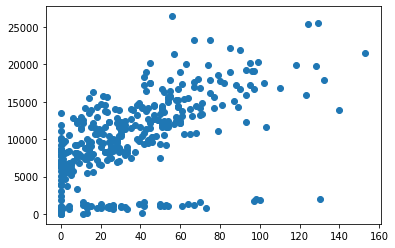

In [10]:
# your answer here
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])

#### What can you say about Minute Very Active and Steps? Write a comment below

In [24]:
# your comment here
#There is some positive correlation but somewaht disperse

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [23]:
# your answer here
data = fitbit[['Minutes Sedentary','Steps']]
correlation = data.corr(method='pearson')
correlation

Minutes Sedentary     Steps
Minutes Sedentary           1.000000  0.076906
Steps                       0.076906  1.000000

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

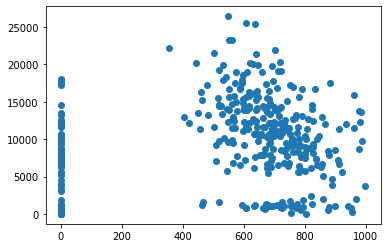

In [25]:
# your answer here
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])

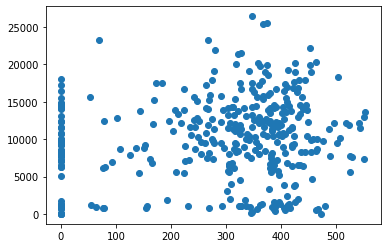

In [16]:
# Your comment here
#While there is a correlation of more than 0.75 it is not liniar in nature

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [26]:
# your answer here
data = fitbit[['MinutesOfSleep','Steps']]
correlation = data.corr(method='pearson')
correlation

MinutesOfSleep     Steps
MinutesOfSleep        1.000000  0.130986
Steps                 0.130986  1.000000

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

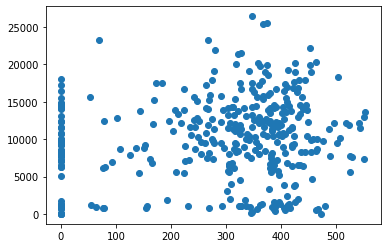

In [27]:
# your answer here
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [19]:
# your answer here
column = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]

In [21]:
#Print cor_fit
cor_fi = column.corr(method='pearson')
cor_fi

Calorie burned     Steps    Floors  Minutes Sedentary  \
Calorie burned             1.000000  0.255305  0.130757           0.125353   
Steps                      0.255305  1.000000  0.306511           0.076906   
Floors                     0.130757  0.306511  1.000000           0.057812   
Minutes Sedentary          0.125353  0.076906  0.057812           1.000000   
Minutes Very Active        0.197881  0.571452  0.399503           0.105963   
MinutesOfSleep             0.011485  0.130986  0.069464           0.204242   

                     Minutes Very Active  MinutesOfSleep  
Calorie burned                  0.197881        0.011485  
Steps                           0.571452        0.130986  
Floors                          0.399503        0.069464  
Minutes Sedentary               0.105963        0.204242  
Minutes Very Active             1.000000        0.108018  
MinutesOfSleep                  0.108018        1.000000

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [22]:
# your answer here
listing = []
lib = cor_fit.values[1]
for value in lib:
    listing.append(value)
listing.sort(reverse=True)
listing

[1.0,
 0.5714518481062607,
 0.30651077257055176,
 0.2553050408017204,
 0.13098565950836363,
 0.0769060806299009]

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [28]:
# your answer here
time_grades = pd.read_csv(r'C:\Users\WM Miramontes\Documents\BootCamp\lab-pivot-table-and-correlation\your_code\time_grades.csv')

In [29]:
#Print time_grades
time_grades.head()

Name  Study time  Grade
0    Jose           4      4
1   Maria           9      7
2   David           8      9
3   Sonia          10      7
4  Samuel          20      9

#### Show visually the frequency distribution of the time_grades dataset.

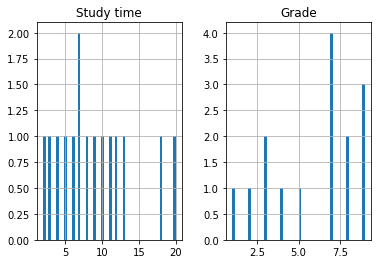

In [30]:

time_grades.hist(bins=50); # your answer here

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [31]:
# your answer here-Pearson 
time_grades.corr(method='spearman')

Study time     Grade
Study time    1.000000  0.819659
Grade         0.819659  1.000000

In [32]:
## your answer here-Spearman
time_grades.corr(method='spearman')

Study time     Grade
Study time    1.000000  0.819659
Grade         0.819659  1.000000

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

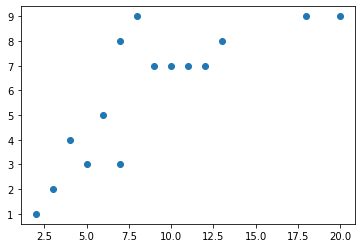

In [34]:
# your answer here
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])

In [34]:
#your comment here
"La correlación de Spearman evalúa la relación monótona entre dos variables continuas u ordinales."
  "En una relación monótona, las variables tienden a cambiar al mismo tiempo, pero no necesariamente a un ritmo constante."
    
"La correlación de Pearson evalúa la relación lineal entre dos variables continuas. Una relación es lineal cuando un cambio en una variable se asocia con un cambio proporcional en la otra variable."

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#your comment here